In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_parquet("../data/Electric_Vehicle_Population_Data_cleaned.parquet")

In [3]:
categorical_cols = ["County","City", 'Make',"State", 'Model',"Electric Vehicle Type", "Electric Utility"]

for col in categorical_cols:
    df[col] = df[col].astype(str)
    df[col] = LabelEncoder().fit_transform(df[col])

In [4]:
features = ['Model Year','Make', 'Electric Range', "County", "Model"]
X = df[features]
y = df['CAFV_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% Training 20% Test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [5]:
logreg = LogisticRegression(max_iter=1000) ## L2-Regression (Ridge)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]


Logistische Regression Evaluation
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     32533
           1       0.92      0.74      0.82     14606

    accuracy                           0.90     47139
   macro avg       0.91      0.85      0.87     47139
weighted avg       0.90      0.90      0.90     47139

ROC-AUC: 0.8938159502409248


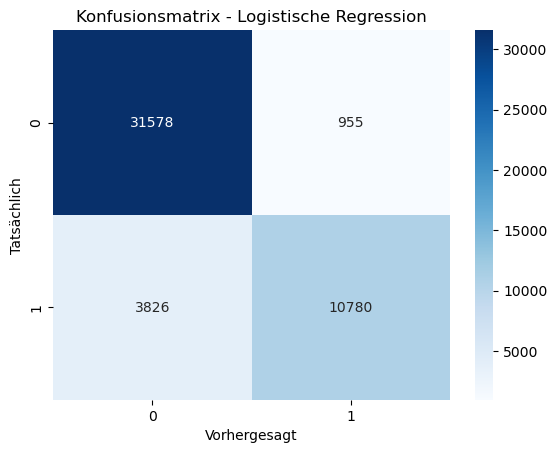

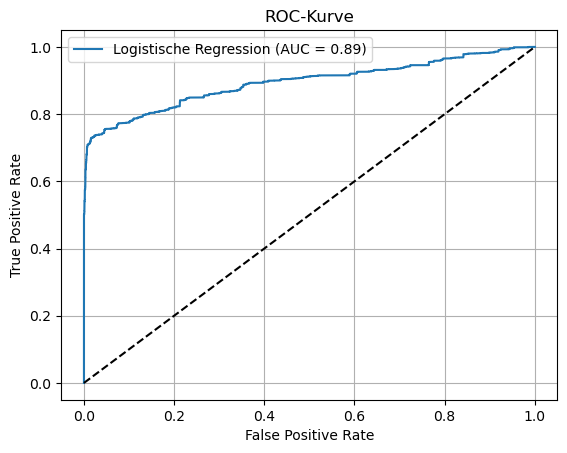

In [8]:
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\n{name} Evaluation")
    print(classification_report(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_proba))

    # Konfusionsmatrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Konfusionsmatrix - {name}")
    plt.xlabel("Vorhergesagt")
    plt.ylabel("Tatsächlich")
    plt.show()

    # ROC-Kurve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_true, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC-Kurve")
    plt.legend()
    plt.grid()
    plt.show()

evaluate_model("Logistische Regression", y_test, y_pred_logreg, y_proba_logreg)